In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


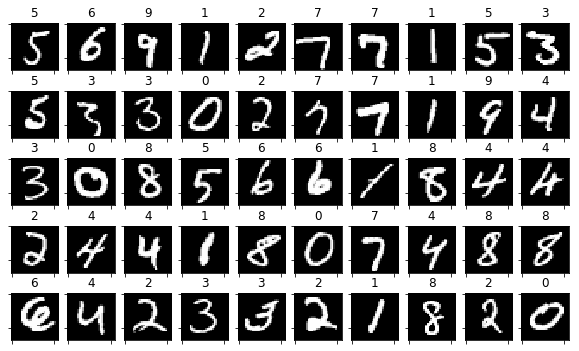

In [3]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# A regular neural network for classification

![alt text](./Images/ann1.png)

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [4]:
yoh = np.eye(10)[y]

In [5]:
i = np.random.randint(len(y))
y[i], yoh[i]

(7, array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

(300, 784) (300, 10)


### create the model

In [7]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [8]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print(input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10)
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

In [9]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


### fit and display losses

In [10]:
model.fit(X_train, y_train_oh, epochs=200, batch_size=32, validation_data=(X_test, y_test_oh))

Train on 300 samples, validate on 1200 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
300/300 [==============================] - 0s 749us/sample - loss: 2.2524 - val_loss: 2.1825
Epoch 2/200
300/300 [==============================] - 0s 129us/sample - loss: 2.0173 - val_loss: 2.0473
Epoch 3/200
300/300 [==============================] - 0s 116us/sample - loss: 1.7996 - val_loss: 1.8303
Epoch 4/200
300/300 [==============================] - 0s 122us/sample - loss: 1.5356 - val_loss: 1.5703
Epoch 5/200
300/300 [==============================] - 0s 130us/sample - loss: 1.2525 - val_loss: 1.3586
Epoch 6/200
300/300 [==============================] - 0s 122us/sample - loss: 0.9964 - val_loss: 1.1328
Epoch 7/200
300/300 [==============================] - 0s 128us/sample - loss: 0.7838 - val_loss: 1.0146
Epoch 8/200
300/300 [==============================] - 0s 121us/sample - loss: 0.6216 - val_loss: 0.8504
Epoch 9/200
300/300 [==============================] - 0s 117us/s

300/300 [==============================] - 0s 156us/sample - loss: 0.0020 - val_loss: 0.7815
Epoch 76/200
300/300 [==============================] - 0s 134us/sample - loss: 0.0019 - val_loss: 0.7878
Epoch 77/200
300/300 [==============================] - 0s 130us/sample - loss: 0.0019 - val_loss: 0.7905
Epoch 78/200
300/300 [==============================] - 0s 136us/sample - loss: 0.0018 - val_loss: 0.7870
Epoch 79/200
300/300 [==============================] - 0s 111us/sample - loss: 0.0017 - val_loss: 0.7887
Epoch 80/200
300/300 [==============================] - 0s 107us/sample - loss: 0.0017 - val_loss: 0.7937
Epoch 81/200
300/300 [==============================] - 0s 112us/sample - loss: 0.0016 - val_loss: 0.7982
Epoch 82/200
300/300 [==============================] - 0s 106us/sample - loss: 0.0016 - val_loss: 0.7995
Epoch 83/200
300/300 [==============================] - 0s 102us/sample - loss: 0.0015 - val_loss: 0.8019
Epoch 84/200
300/300 [==============================] - 0s 

Epoch 150/200
300/300 [==============================] - 0s 109us/sample - loss: 3.6925e-04 - val_loss: 0.8938
Epoch 151/200
300/300 [==============================] - 0s 113us/sample - loss: 3.6273e-04 - val_loss: 0.8950
Epoch 152/200
300/300 [==============================] - 0s 113us/sample - loss: 3.5718e-04 - val_loss: 0.8968
Epoch 153/200
300/300 [==============================] - 0s 102us/sample - loss: 3.5068e-04 - val_loss: 0.8968
Epoch 154/200
300/300 [==============================] - 0s 106us/sample - loss: 3.4537e-04 - val_loss: 0.8973
Epoch 155/200
300/300 [==============================] - 0s 110us/sample - loss: 3.3983e-04 - val_loss: 0.8988
Epoch 156/200
300/300 [==============================] - 0s 120us/sample - loss: 3.3375e-04 - val_loss: 0.8994
Epoch 157/200
300/300 [==============================] - 0s 139us/sample - loss: 3.2937e-04 - val_loss: 0.9017
Epoch 158/200
300/300 [==============================] - 0s 117us/sample - loss: 3.2398e-04 - val_loss: 0.9022
E

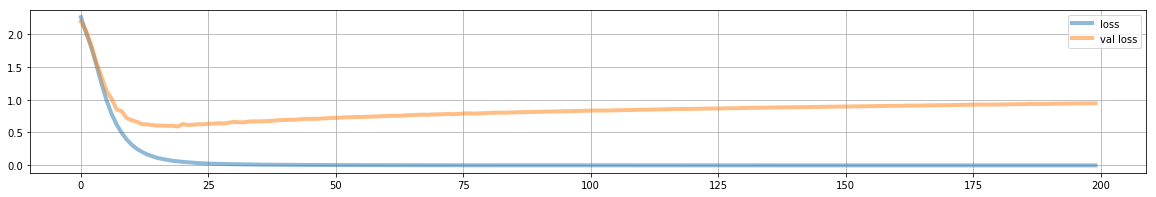

In [11]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [12]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 1.000
accuracy test  0.819


# Multimodal network

We will simulate we have information about our data from an additional source. This can be the case when we have, for instance, medical images and associated clinical data. In this situation we have **multimodal data** (images and numeric).

We would like to have an arquitecture in which we can inject both image and numeric data.

In this case, we assume we have an additional information source, telling us with a size 2 vector whether each image contains an odd or even number (with vaues `[1 0]`  or `[0 1]`)

This new info **is injected at LAYER 3** simply concatenating the neurons

![alt text](./Images/ann2.png)

Number of connections:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observe how this new architecture is built, and how the two kinds of information are handled both when building the network or when fitting or predicting

In [13]:
def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,))
    l11 = Dense(s1, activation="relu")(inp1)
    l12 = Dense(s2, activation="relu")(l11)
    l13 = Dense(s3, activation=s3_activation)(l12)
    
    inp2 = Input(shape=(extra_info_dim,))
    cc1 = concatenate([l13, inp2],axis=1) # Merge row, same column
    output = Dense(10, activation='softmax')(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

We simulate extra information, we could actually have several choices to encode this information, for instance

- `[ 1, 0] [ 0, 1]` or
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` among others

Observe how **k0**, **k1** control how the data is represented. Try:
    
- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

to understand how this coding affects the representation

In [14]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [15]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           39250       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           1530        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           620         dense_1[0][0]                    
__________________________________________________________________________________________________
input_2 (I

In [16]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=200, batch_size=32, 
          validation_data=([X_test, X_test_extra], y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 0s 778us/sample - loss: 2.2814 - val_loss: 2.1153
Epoch 2/200
300/300 [==============================] - 0s 112us/sample - loss: 1.9450 - val_loss: 1.8597
Epoch 3/200
300/300 [==============================] - 0s 116us/sample - loss: 1.6507 - val_loss: 1.6629
Epoch 4/200
300/300 [==============================] - 0s 115us/sample - loss: 1.4248 - val_loss: 1.4861
Epoch 5/200
300/300 [==============================] - 0s 108us/sample - loss: 1.2305 - val_loss: 1.3489
Epoch 6/200
300/300 [==============================] - 0s 112us/sample - loss: 1.0618 - val_loss: 1.2207
Epoch 7/200
300/300 [==============================] - 0s 116us/sample - loss: 0.9134 - val_loss: 1.1177
Epoch 8/200
300/300 [==============================] - 0s 116us/sample - loss: 0.7839 - val_loss: 1.0298
Epoch 9/200
300/300 [==============================] - 0s 124us/sample - loss: 0.6673 - val_loss: 0.9431
Epoch 10

Epoch 78/200
300/300 [==============================] - 0s 124us/sample - loss: 0.0118 - val_loss: 0.6025
Epoch 79/200
300/300 [==============================] - 0s 110us/sample - loss: 0.0115 - val_loss: 0.6049
Epoch 80/200
300/300 [==============================] - 0s 114us/sample - loss: 0.0112 - val_loss: 0.6046
Epoch 81/200
300/300 [==============================] - 0s 117us/sample - loss: 0.0110 - val_loss: 0.6051
Epoch 82/200
300/300 [==============================] - 0s 119us/sample - loss: 0.0107 - val_loss: 0.6052
Epoch 83/200
300/300 [==============================] - 0s 108us/sample - loss: 0.0105 - val_loss: 0.6054
Epoch 84/200
300/300 [==============================] - 0s 113us/sample - loss: 0.0103 - val_loss: 0.6053
Epoch 85/200
300/300 [==============================] - 0s 116us/sample - loss: 0.0100 - val_loss: 0.6070
Epoch 86/200
300/300 [==============================] - 0s 114us/sample - loss: 0.0098 - val_loss: 0.6076
Epoch 87/200
300/300 [========================

Epoch 155/200
300/300 [==============================] - 0s 102us/sample - loss: 0.0035 - val_loss: 0.6437
Epoch 156/200
300/300 [==============================] - 0s 107us/sample - loss: 0.0034 - val_loss: 0.6444
Epoch 157/200
300/300 [==============================] - 0s 109us/sample - loss: 0.0034 - val_loss: 0.6449
Epoch 158/200
300/300 [==============================] - 0s 112us/sample - loss: 0.0034 - val_loss: 0.6455
Epoch 159/200
300/300 [==============================] - 0s 106us/sample - loss: 0.0033 - val_loss: 0.6457
Epoch 160/200
300/300 [==============================] - 0s 109us/sample - loss: 0.0033 - val_loss: 0.6459
Epoch 161/200
300/300 [==============================] - 0s 108us/sample - loss: 0.0033 - val_loss: 0.6468
Epoch 162/200
300/300 [==============================] - 0s 100us/sample - loss: 0.0032 - val_loss: 0.6476
Epoch 163/200
300/300 [==============================] - 0s 106us/sample - loss: 0.0032 - val_loss: 0.6478
Epoch 164/200
300/300 [==============

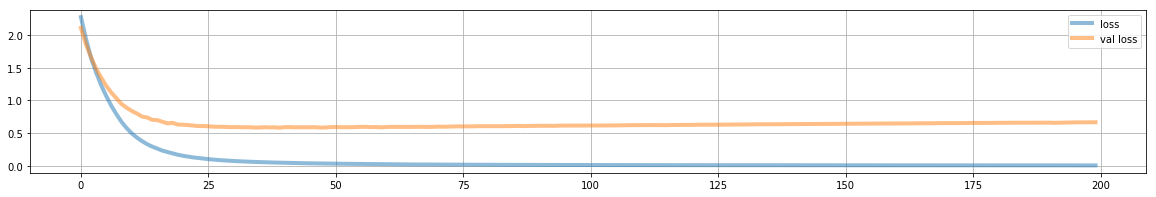

In [17]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [18]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 1.000
accuracy test  0.813
